<a href="https://colab.research.google.com/github/dfklsna/sangwoo-Kim/blob/main/Bigdata_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 성격특성과 화면크기가 응답시간에 미치는 영향

##1. 데이터 불러오기
-----






In [1]:
import pandas as pd

# 데이터 경로 설정
data_path = '/content/data-final.csv'
# 데이터 로드
data = pd.read_csv(data_path, sep='\t')

# 데이터 확인
print(data.head())

# 데이터 크기 확인
print(f"데이터 크기: {data.shape}")

# 데이터 샘플 확인
print("\n데이터 미리보기:")
print(data.head())

# 데이터 열 목록 확인
print("\n데이터 열 목록:")
print(data.columns)

   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   

              dateload  screenw  screenh  introelapse  testelapse  endelapse  \
0  2016-03-03 02:01:01    768.0   1024.0          9.0       234.0          6   
1  2016-03-03 02:01:20   1360.0    768.0         12.0       179.0         11   
2  2016-03-03 02:01:56   1366.0    768.0          3.0       186.0          7   
3  2016-03-03 02:02:02   1920.0   1200.0        186.0       219.0          7   
4  2016-03-03 02:02:57   1366.0    768.0          8.0       315.0         17   

   IPC  country  lat_appx_lots_of_err  long_appx_lots_of_err  
0    1       GB              

## 2. 데이터 전처리
### 2-1. 제외할 열 결정
-----

In [2]:
# 제외할 열 목록 정의
columns_to_exclude = ['dateload', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err', 'IPC', 'introelapse', 'endelapse']

# 제외할 열을 제외한 나머지 열 선택
selected_columns = [col for col in data.columns if col not in columns_to_exclude]

# 데이터 필터링
filtered_data = data[selected_columns]

# 결과 확인
print(f"필터링된 데이터의 총 열 개수: {len(selected_columns)}")
print("\n필터링된 데이터 미리보기:")
print(filtered_data.head())

필터링된 데이터의 총 열 개수: 103

필터링된 데이터 미리보기:
   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN4_E  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...  3411.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...  3026.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...  1683.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...  3728.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...  7029.0   

   OPN5_E  OPN6_E  OPN7_E  OPN8_E   OPN9_E  OPN10_E  screenw  screenh  \
0  2170.0  4920.0  4436.0  3116.0   2992.0   4354.0    768.0   1024.0   
1  4742.0  3336.0  2718.0  3374.0   3096.0   3019.0   1360.0    768.0   
2  2229.0  8114.0  2043.0  6295.0   1585.0   2529.0   1366.0    768.0   
3  4128.0  3776.0  2984.0  4192.0   3480.0   3257.0   1920.0   1200.0   
4  2327.0  5835.0  6846.0  5320.0  11401.0   8642.0   1366.0    768.0   

   testelapse  
0       234.0  
1       179.0  


## 2-2. 결측치 처리
-----

In [3]:
# 결측치 확인 전 데이터 크기
print(f"원래 데이터 크기: {data.shape}")

# 각 열의 결측치 개수 확인
print("\n각 열의 결측치 개수:")
print(data.isnull().sum())

# 결측치 제거
data_no_na = data.dropna()

# 결측치 제거 후 데이터 크기
print(f"\n결측치 제거 후 데이터 크기: {data_no_na.shape}")

# 결측치 제거 후 확인
print("\n결측치 제거 후 남은 결측치:")
print(data_no_na.isnull().sum())


원래 데이터 크기: (1015341, 110)

각 열의 결측치 개수:
EXT1                     1783
EXT2                     1783
EXT3                     1783
EXT4                     1783
EXT5                     1783
                         ... 
endelapse                   0
IPC                         0
country                    77
lat_appx_lots_of_err        0
long_appx_lots_of_err       0
Length: 110, dtype: int64

결측치 제거 후 데이터 크기: (1012050, 110)

결측치 제거 후 남은 결측치:
EXT1                     0
EXT2                     0
EXT3                     0
EXT4                     0
EXT5                     0
                        ..
endelapse                0
IPC                      0
country                  0
lat_appx_lots_of_err     0
long_appx_lots_of_err    0
Length: 110, dtype: int64


### 2-3. 이상치 제거
-----

In [4]:
# 화면 크기 (가로 x 세로) 계산
data['screen_area'] = data['screenw'] * data['screenh']

# 계산된 값 확인
print(data[['screenw', 'screenh', 'screen_area']].head())

# 이상치 기준 설정

min_screen_area = 240 * 432  # 최소 화면 크기 기준 (스마트폰)
max_screen_area = 3840 * 2160  # 최대 화면 크기 기준 (4K 모니터)

# 이상치 제거
filtered_data = data[(data['screen_area'] >= min_screen_area) & (data['screen_area'] <= max_screen_area)]

# 이상치 제거 후 요약 통계
print("이상치 제거 전 데이터 통계:")
print(data['screen_area'].describe())

print("\n이상치 제거 후 데이터 통계:")
print(filtered_data['screen_area'].describe())


   screenw  screenh  screen_area
0    768.0   1024.0     786432.0
1   1360.0    768.0    1044480.0
2   1366.0    768.0    1049088.0
3   1920.0   1200.0    2304000.0
4   1366.0    768.0    1049088.0
이상치 제거 전 데이터 통계:
count    1.013275e+06
mean     1.023606e+06
std      6.766196e+05
min      0.000000e+00
25%      3.047040e+05
50%      1.049088e+06
75%      1.296000e+06
max      1.049088e+08
Name: screen_area, dtype: float64

이상치 제거 후 데이터 통계:
count    1.010206e+06
mean     1.026340e+06
std      6.579593e+05
min      1.036800e+05
25%      3.047040e+05
50%      1.049088e+06
75%      1.296000e+06
max      8.294400e+06
Name: screen_area, dtype: float64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 응답 시간 열 선택
response_time_cols = [col for col in data.columns if '_E' in col]

# 100ms 초과 및 60,000ms 이하 데이터 필터링
filtered_data = data.copy()

# 모든 응답 시간 변수를 하나로 합쳐서 분포 확인
response_times = filtered_data[response_time_cols].melt(value_name='Response Time (ms)')
upper_limit = response_times['Response Time (ms)'].quantile(0.99)
print(f"99th Percentile (Upper Limit): {upper_limit} ms")

for col in response_time_cols:
    filtered_data = filtered_data[(filtered_data[col] > 100) & (filtered_data[col] <= upper_limit)]

# 결과 확인
print("응답 시간 전처리 전 통계:")
print(data[response_time_cols].describe())

print("\n응답 시간 전처리 후 통계:")
print(filtered_data[response_time_cols].describe())

99th Percentile (Upper Limit): 37027.0 ms
응답 시간 전처리 전 통계:
             EXT1_E        EXT2_E        EXT3_E        EXT4_E        EXT5_E  \
count  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06   
mean   9.701995e+04  8.341048e+03  1.164124e+04  7.645369e+03  7.143988e+03   
std    4.887845e+06  5.625322e+05  2.328113e+06  3.381860e+05  6.023786e+05   
min   -4.295876e+07 -7.563200e+04 -3.593866e+06 -2.494907e+06 -5.856600e+04   
25%    4.795000e+03  2.384000e+03  2.462000e+03  2.403000e+03  2.119000e+03   
50%    7.340000e+03  3.418000e+03  3.484000e+03  3.479000e+03  3.006000e+03   
75%    1.225700e+04  5.085000e+03  5.151000e+03  5.250000e+03  4.506000e+03   
max    2.147484e+09  2.617734e+08  2.147484e+09  1.687112e+08  3.510680e+08   

             EXT6_E        EXT7_E        EXT8_E        EXT9_E       EXT10_E  \
count  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06   
mean   7.453523e+03  1.089923e+04  7.039182e+03  6.157744e+03  7.417393e

In [6]:
# 성격 특성 열 명시적으로 정의
personality_cols = [
    f"EXT{i}" for i in range(1, 11)
] + [
    f"EST{i}" for i in range(1, 11)
] + [
    f"AGR{i}" for i in range(1, 11)
] + [
    f"CSN{i}" for i in range(1, 11)
] + [
    f"OPN{i}" for i in range(1, 11)
]

# 성격 특성 값이 1~5 범위 내에 있는 데이터만 유지
valid_rows = data[personality_cols].apply(lambda x: x.between(1, 5).all(), axis=1)

# 필터링된 데이터 유지
filtered_data = data[valid_rows]

# 결과 확인
print(f"1~5 범위 필터링 후 데이터 크기: {filtered_data.shape}")
print("\n필터링된 데이터 미리보기:")
print(filtered_data[personality_cols].head())



1~5 범위 필터링 후 데이터 크기: (874434, 111)

필터링된 데이터 미리보기:
   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN1  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   5.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   1.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   5.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   4.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   5.0   

   OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  
0   1.0   4.0   1.0   4.0   1.0   5.0   3.0   4.0    5.0  
1   2.0   4.0   2.0   3.0   1.0   4.0   2.0   5.0    3.0  
2   1.0   2.0   1.0   4.0   2.0   5.0   3.0   4.0    4.0  
3   2.0   5.0   2.0   3.0   1.0   4.0   4.0   3.0    3.0  
4   1.0   5.0   1.0   5.0   1.0   5.0   3.0   5.0    5.0  

[5 rows x 50 columns]


In [7]:
import numpy as np

# 조건 정의
# filtered_data를 복사본으로 생성
filtered_data = filtered_data.copy()

conditions = [
    (filtered_data['screenw'] <= 1080) & (filtered_data['screenh'] <= 2400),
    (filtered_data['screenw'] <= 1920) & (filtered_data['screenh'] <= 2560)
]

# 결과 정의
categories = ['Smartphone', 'Tablet']

# 카테고리 열 추가
# 화면 크기 구분 열 추가 (명시적으로 loc 사용)
filtered_data.loc[:, 'screen_category'] = np.select(conditions, categories, default='Desktop')


# 결과 확인
print(filtered_data[['screenw', 'screenh', 'screen_category']].head())


# personality_cols가 filtered_data에 존재하는지 확인
missing_cols = [col for col in personality_cols if col not in filtered_data.columns]
if missing_cols:
    print(f"Missing personality columns: {missing_cols}")
else:
    print("All personality columns are present.")


   screenw  screenh screen_category
0    768.0   1024.0      Smartphone
1   1360.0    768.0          Tablet
2   1366.0    768.0          Tablet
3   1920.0   1200.0          Tablet
4   1366.0    768.0          Tablet
All personality columns are present.


## 3. 데이터 분석
### 3-1. 데이터 요약 및 탐색(EDA)
-----

In [8]:
# 데이터 크기 확인
print(f"데이터 크기: {filtered_data.shape}")

# 데이터 열 목록 확인
print("\n데이터 열 목록:")
print(filtered_data.columns)

# 간단한 통계 요약
print("\n데이터 통계 요약:")
print(filtered_data.describe())

# 결측치 확인
print("\n각 열의 결측치 개수:")
print(filtered_data.isnull().sum())

데이터 크기: (874434, 112)

데이터 열 목록:
Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'screenh', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'country',
       'lat_appx_lots_of_err', 'long_appx_lots_of_err', 'screen_area',
       'screen_category'],
      dtype='object', length=112)

데이터 통계 요약:
                EXT1           EXT2           EXT3           EXT4  \
count  874434.000000  874434.000000  874434.000000  874434.000000   
mean        2.645693       2.795889       3.298964       3.167806   
std         1.250871       1.306720       1.188259       1.210432   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       2.000000       2.000000       2.000000   
50%         3.000000       3.000000       3.000000       3.000000   
75%         4.000000       4.000000       4.000000       4.000000   
max         5.000000       5.000000       5.000000       5.000000   

                E

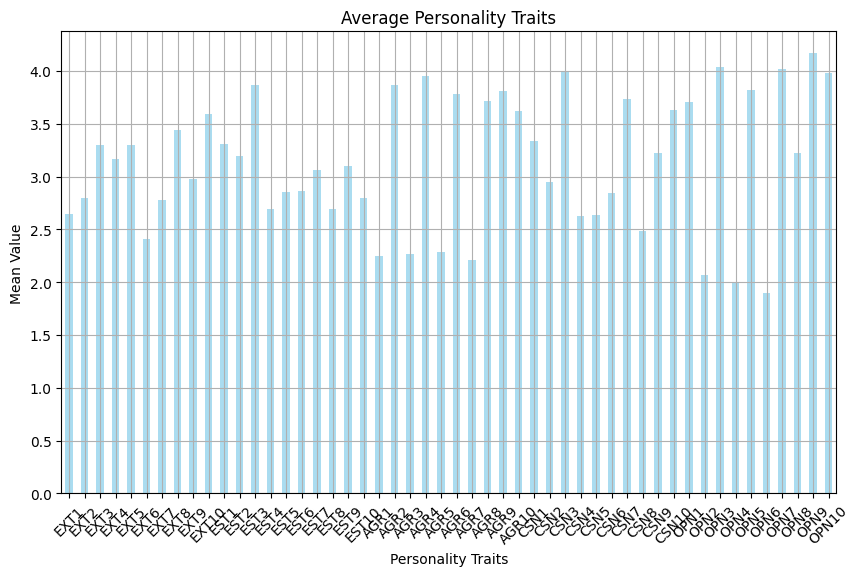

In [9]:
# 성격 특성 데이터 분포 확인

plt.figure(figsize=(10, 6))
filtered_data[personality_cols].mean().plot(kind="bar", color="skyblue", alpha=0.7)
plt.title("Average Personality Traits")
plt.xlabel("Personality Traits")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### 3-2. 화면 크기와 성격 특성 간 관계 분석
-----

In [10]:
# 화면 크기별 성격 특성 평균 계산
category_means = filtered_data.groupby('screen_category')[personality_cols].mean()

# 결과 확인
print("화면 크기별 성격 특성 평균:")
print(category_means)

화면 크기별 성격 특성 평균:
                     EXT1      EXT2      EXT3      EXT4      EXT5      EXT6  \
screen_category                                                               
Desktop          2.545447  2.882681  3.266953  3.206622  3.258437  2.338427   
Smartphone       2.601876  2.828632  3.216614  3.215188  3.251359  2.446590   
Tablet           2.671679  2.776203  3.344287  3.141269  3.323389  2.393702   

                     EXT7      EXT8      EXT9     EXT10  ...      OPN1  \
screen_category                                          ...             
Desktop          2.671442  3.458055  2.964343  3.565823  ...  3.913403   
Smartphone       2.729920  3.459057  2.969628  3.645494  ...  3.744989   
Tablet           2.810314  3.435508  2.985243  3.557799  ...  3.675570   

                     OPN2      OPN3      OPN4      OPN5      OPN6      OPN7  \
screen_category                                                               
Desktop          1.813594  4.101640  1.791786  3.977077  1

<Figure size 1000x600 with 0 Axes>

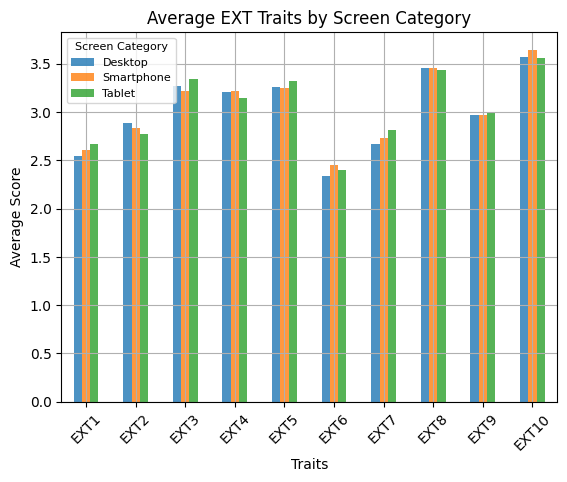

<Figure size 1000x600 with 0 Axes>

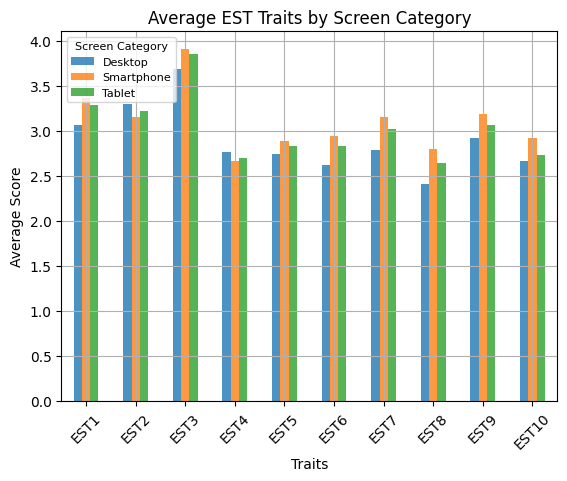

<Figure size 1000x600 with 0 Axes>

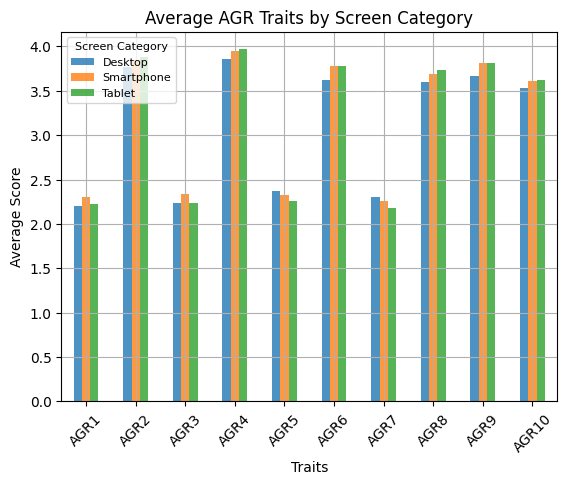

<Figure size 1000x600 with 0 Axes>

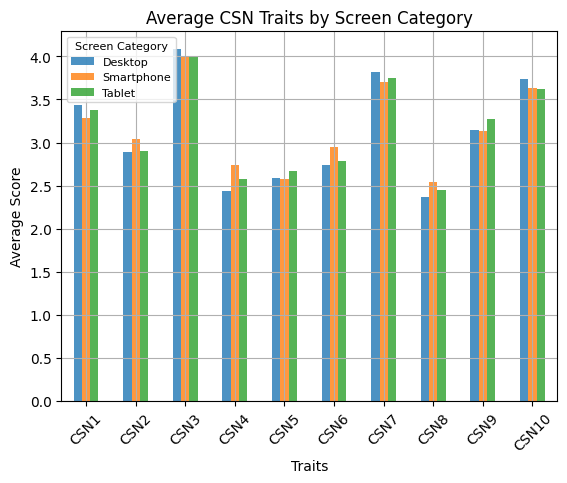

<Figure size 1000x600 with 0 Axes>

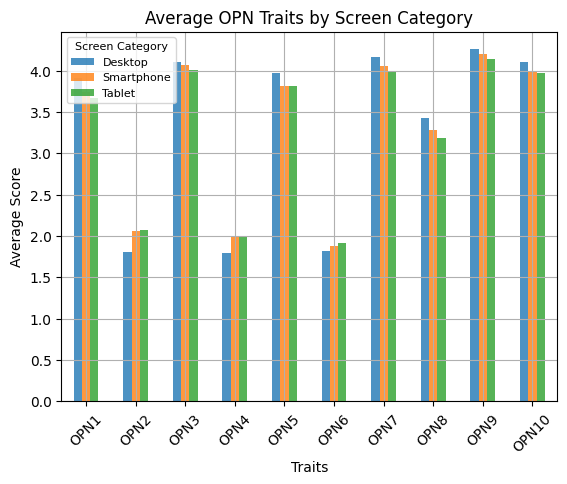

In [11]:
# 성격 특성 그룹별 나누기
trait_groups = {
    "EXT": [f"EXT{i}" for i in range(1, 11)],
    "EST": [f"EST{i}" for i in range(1, 11)],
    "AGR": [f"AGR{i}" for i in range(1, 11)],
    "CSN": [f"CSN{i}" for i in range(1, 11)],
    "OPN": [f"OPN{i}" for i in range(1, 11)],
}

# 각 성격 특성 그룹별로 그래프 생성
for trait, columns in trait_groups.items():
    # 화면 크기별 해당 성격 특성 평균 계산
    group_means = filtered_data.groupby('screen_category')[columns].mean()

    # 시각화
    plt.figure(figsize=(10, 6))
    group_means.T.plot(kind='bar', alpha=0.8)
    plt.title(f"Average {trait} Traits by Screen Category")
    plt.xlabel("Traits")
    plt.ylabel("Average Score")
    plt.xticks(rotation=45)

    # 범례 크기 조정
    plt.legend(title="Screen Category", fontsize=8, title_fontsize=8, loc='upper left')
    plt.grid(True)
    plt.show()


In [12]:
from scipy.stats import f_oneway

# ANOVA 결과 저장 딕셔너리
anova_results = {}

# 모든 성격 특성에 대해 반복 수행
for trait in personality_cols:
    # 각 화면 크기별로 데이터 분리
    desktop_scores = filtered_data[filtered_data['screen_category'] == 'Desktop'][trait]
    tablet_scores = filtered_data[filtered_data['screen_category'] == 'Tablet'][trait]
    smartphone_scores = filtered_data[filtered_data['screen_category'] == 'Smartphone'][trait]

    # ANOVA 테스트
    anova_result = f_oneway(desktop_scores, tablet_scores, smartphone_scores)

    # 결과 저장
    anova_results[trait] = {'F-statistic': anova_result.statistic, 'P-value': anova_result.pvalue}

    # 결과 출력 (지수 표기)
    print(f"ANOVA 결과 ({trait}):")
    print(f"F-statistic: {anova_result.statistic:.2f}")
    print(f"P-value: {anova_result.pvalue:.2e}")  # 지수 표기
    if anova_result.pvalue < 0.05:
        print(f"-> {trait}: 화면 크기 그룹 간 평균 차이는 유의미합니다.\n")
    else:
        print(f"-> {trait}: 화면 크기 그룹 간 평균 차이는 유의미하지 않습니다.\n")


ANOVA 결과 (EXT1):
F-statistic: 347.04
P-value: 2.19e-151
-> EXT1: 화면 크기 그룹 간 평균 차이는 유의미합니다.

ANOVA 결과 (EXT2):
F-statistic: 186.30
P-value: 1.29e-81
-> EXT2: 화면 크기 그룹 간 평균 차이는 유의미합니다.

ANOVA 결과 (EXT3):
F-statistic: 1141.38
P-value: 0.00e+00
-> EXT3: 화면 크기 그룹 간 평균 차이는 유의미합니다.

ANOVA 결과 (EXT4):
F-statistic: 373.13
P-value: 1.05e-162
-> EXT4: 화면 크기 그룹 간 평균 차이는 유의미합니다.

ANOVA 결과 (EXT5):
F-statistic: 338.16
P-value: 1.56e-147
-> EXT5: 화면 크기 그룹 간 평균 차이는 유의미합니다.

ANOVA 결과 (EXT6):
F-statistic: 211.21
P-value: 1.98e-92
-> EXT6: 화면 크기 그룹 간 평균 차이는 유의미합니다.

ANOVA 결과 (EXT7):
F-statistic: 373.17
P-value: 1.00e-162
-> EXT7: 화면 크기 그룹 간 평균 차이는 유의미합니다.

ANOVA 결과 (EXT8):
F-statistic: 36.11
P-value: 2.09e-16
-> EXT8: 화면 크기 그룹 간 평균 차이는 유의미합니다.

ANOVA 결과 (EXT9):
F-statistic: 14.47
P-value: 5.18e-07
-> EXT9: 화면 크기 그룹 간 평균 차이는 유의미합니다.

ANOVA 결과 (EXT10):
F-statistic: 467.56
P-value: 1.12e-203
-> EXT10: 화면 크기 그룹 간 평균 차이는 유의미합니다.

ANOVA 결과 (EST1):
F-statistic: 530.21
P-value: 7.45e-231
-> EST1: 화면 크기 그룹 간 평균 차이는 유

### 3-3. 성격 특성과 응답 시간 간의 상관관계
-----

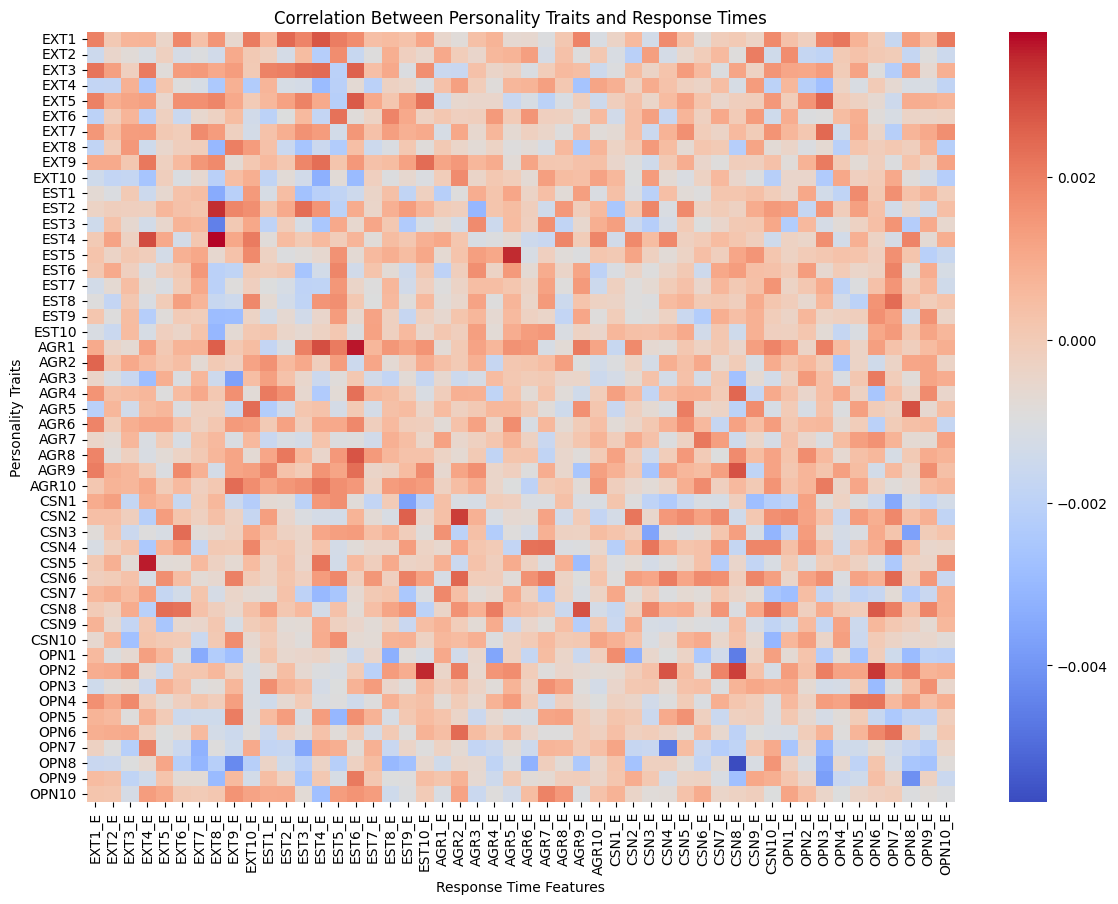

In [13]:
# 응답 시간 열 선택
response_time_cols = [col for col in filtered_data.columns if '_E' in col]

# 성격 특성과 응답 시간 간 상관관계 계산
corr_matrix = filtered_data[personality_cols + response_time_cols].corr()

# 히트맵 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix.loc[personality_cols, response_time_cols], annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Between Personality Traits and Response Times")
plt.xlabel("Response Time Features")
plt.ylabel("Personality Traits")
plt.show()


In [14]:
# ANOVA 테스트 결과 저장
anova_results = {}

for col in response_time_cols:
    desktop_scores = filtered_data[filtered_data['screen_category'] == 'Desktop'][col]
    tablet_scores = filtered_data[filtered_data['screen_category'] == 'Tablet'][col]
    smartphone_scores = filtered_data[filtered_data['screen_category'] == 'Smartphone'][col]

    # ANOVA 테스트
    anova_result = f_oneway(desktop_scores, tablet_scores, smartphone_scores)
    anova_results[col] = {'F-statistic': anova_result.statistic, 'P-value': anova_result.pvalue}

    # 결과 출력
    print(f"ANOVA 결과 ({col}):")
    print(f"F-statistic: {anova_result.statistic:.2f}")
    print(f"P-value: {anova_result.pvalue:.4e}")
    if anova_result.pvalue < 0.05:
        print(f"-> {col}: 화면 크기 그룹 간 평균 차이는 유의미합니다.\n")
    else:
        print(f"-> {col}: 화면 크기 그룹 간 평균 차이는 유의미하지 않습니다.\n")


ANOVA 결과 (EXT1_E):
F-statistic: 37.50
P-value: 5.1792e-17
-> EXT1_E: 화면 크기 그룹 간 평균 차이는 유의미합니다.

ANOVA 결과 (EXT2_E):
F-statistic: 1.36
P-value: 2.5571e-01
-> EXT2_E: 화면 크기 그룹 간 평균 차이는 유의미하지 않습니다.

ANOVA 결과 (EXT3_E):
F-statistic: 0.58
P-value: 5.5837e-01
-> EXT3_E: 화면 크기 그룹 간 평균 차이는 유의미하지 않습니다.

ANOVA 결과 (EXT4_E):
F-statistic: 2.23
P-value: 1.0804e-01
-> EXT4_E: 화면 크기 그룹 간 평균 차이는 유의미하지 않습니다.

ANOVA 결과 (EXT5_E):
F-statistic: 0.49
P-value: 6.1473e-01
-> EXT5_E: 화면 크기 그룹 간 평균 차이는 유의미하지 않습니다.

ANOVA 결과 (EXT6_E):
F-statistic: 0.30
P-value: 7.3908e-01
-> EXT6_E: 화면 크기 그룹 간 평균 차이는 유의미하지 않습니다.

ANOVA 결과 (EXT7_E):
F-statistic: 3.08
P-value: 4.5771e-02
-> EXT7_E: 화면 크기 그룹 간 평균 차이는 유의미합니다.

ANOVA 결과 (EXT8_E):
F-statistic: 0.21
P-value: 8.0844e-01
-> EXT8_E: 화면 크기 그룹 간 평균 차이는 유의미하지 않습니다.

ANOVA 결과 (EXT9_E):
F-statistic: 0.07
P-value: 9.2992e-01
-> EXT9_E: 화면 크기 그룹 간 평균 차이는 유의미하지 않습니다.

ANOVA 결과 (EXT10_E):
F-statistic: 1.00
P-value: 3.6917e-01
-> EXT10_E: 화면 크기 그룹 간 평균 차이는 유의미하지 않습니다.

ANOVA 결과 (EST1_

### 3-4. 화면크기와 응답시간 간의 상관관계
-----


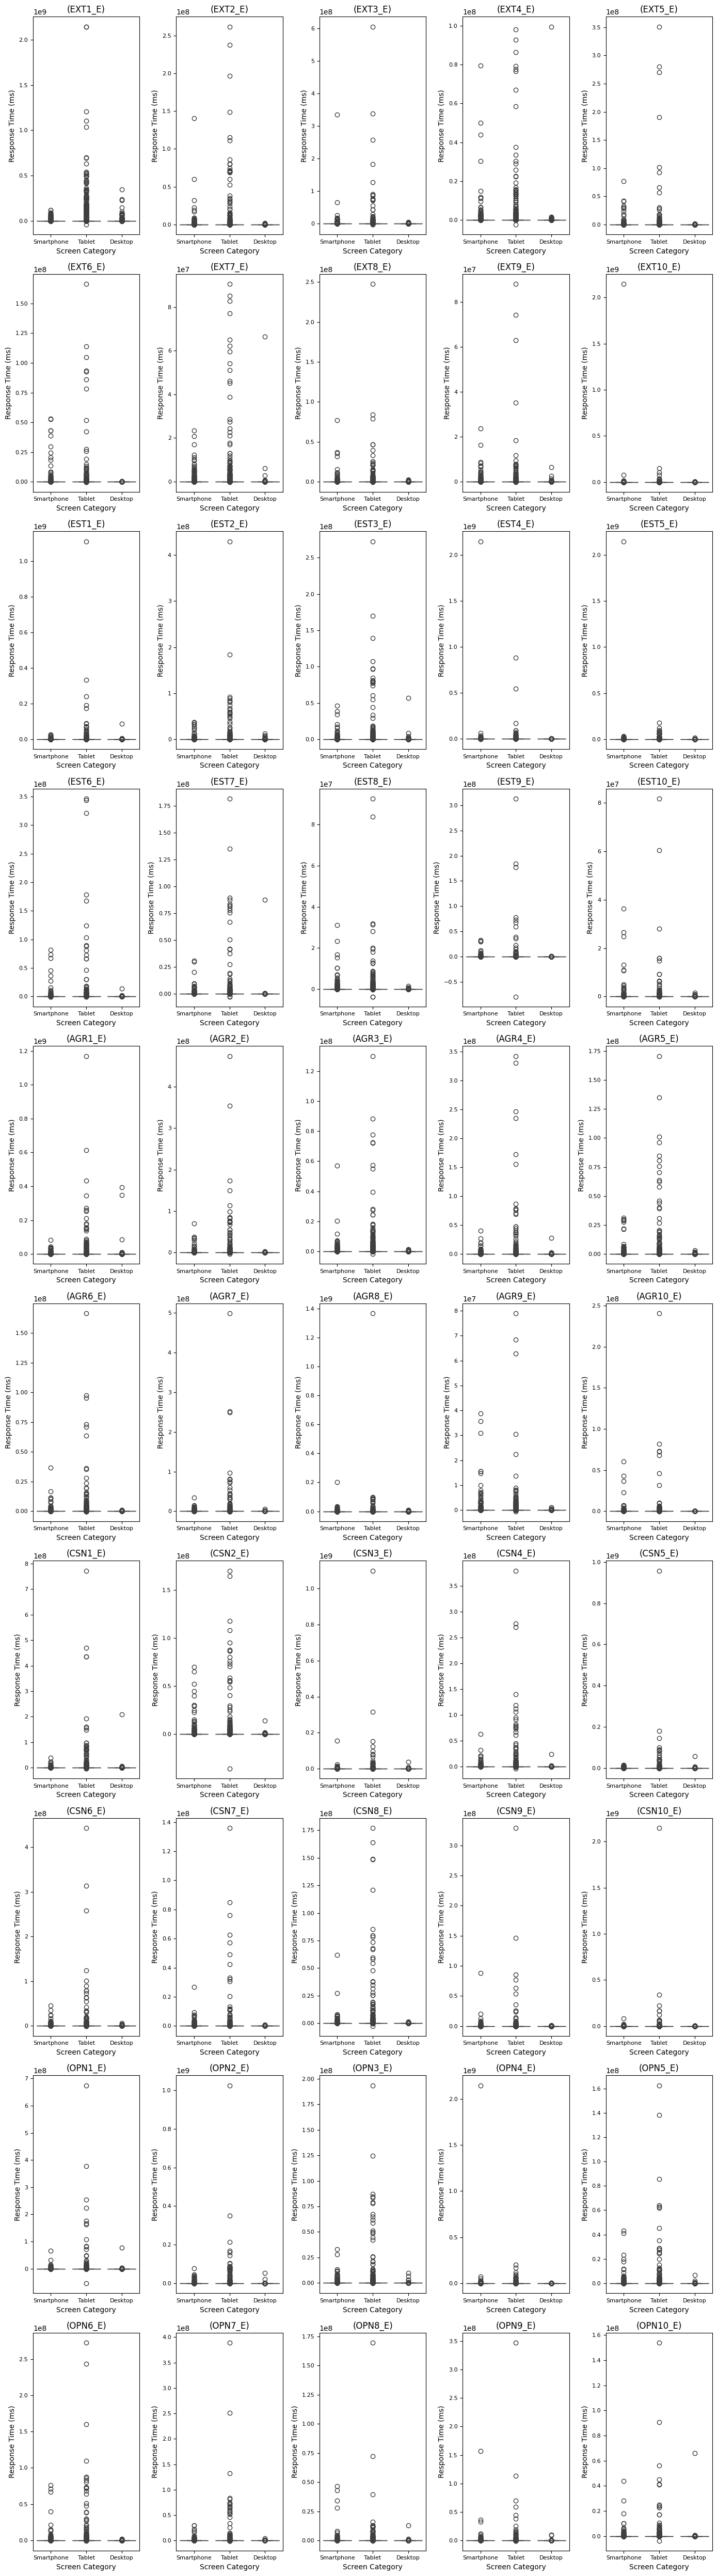

In [15]:
import math

# 전체 응답 시간 변수의 개수
n_cols = 5  # 한 행에 두 개의 그래프
n_rows = math.ceil(len(response_time_cols) / n_cols)  # 행의 개수 계산

# 서브플롯 생성
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 5))

# 그래프 생성
for i, col in enumerate(response_time_cols):
    row = i // n_cols  # 행 인덱스 계산
    col_index = i % n_cols  # 열 인덱스 계산

    sns.boxplot(data=filtered_data, x='screen_category', y=col, ax=axes[row, col_index])
    axes[row, col_index].set_title(f"({col})", fontsize=12)
    axes[row, col_index].set_xlabel("Screen Category", fontsize=10)
    axes[row, col_index].set_ylabel("Response Time (ms)", fontsize=10)
    axes[row, col_index].tick_params(axis='x', labelsize=8)
    axes[row, col_index].tick_params(axis='y', labelsize=8)

# 빈 서브플롯 제거
for j in range(len(response_time_cols), n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [16]:
# 화면 크기별 응답 시간 평균 계산
response_time_means = filtered_data.groupby('screen_category')[response_time_cols].mean()

# 화면 크기별 순위 도출
for col in response_time_cols:
    sorted_means = response_time_means[col].sort_values()
    rank = " < ".join(sorted_means.index)  # 순서대로 화면 크기 이름 연결
    print(f"{col}: {rank}")


EXT1_E: Smartphone < Tablet < Desktop
EXT2_E: Desktop < Smartphone < Tablet
EXT3_E: Desktop < Smartphone < Tablet
EXT4_E: Smartphone < Tablet < Desktop
EXT5_E: Desktop < Smartphone < Tablet
EXT6_E: Desktop < Tablet < Smartphone
EXT7_E: Smartphone < Tablet < Desktop
EXT8_E: Desktop < Smartphone < Tablet
EXT9_E: Desktop < Tablet < Smartphone
EXT10_E: Desktop < Tablet < Smartphone
EST1_E: Smartphone < Tablet < Desktop
EST2_E: Smartphone < Desktop < Tablet
EST3_E: Smartphone < Tablet < Desktop
EST4_E: Desktop < Tablet < Smartphone
EST5_E: Desktop < Tablet < Smartphone
EST6_E: Desktop < Smartphone < Tablet
EST7_E: Smartphone < Tablet < Desktop
EST8_E: Desktop < Tablet < Smartphone
EST9_E: Desktop < Smartphone < Tablet
EST10_E: Desktop < Tablet < Smartphone
AGR1_E: Smartphone < Tablet < Desktop
AGR2_E: Desktop < Smartphone < Tablet
AGR3_E: Desktop < Smartphone < Tablet
AGR4_E: Smartphone < Desktop < Tablet
AGR5_E: Desktop < Smartphone < Tablet
AGR6_E: Desktop < Smartphone < Tablet
AGR7_E: De

데이터셋: https://www.kaggle.com/datasets/tunguz/big-five-personality-test/code